# Procesado de datos

## Ejemplo

In [160]:
import cv2
import os
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Variables

In [2]:
IMG_SIZE = 256

In [3]:
nodo1 = cv2.imread("./fotogramas/Fotogramas/nodo1/nodo100001.jpg")

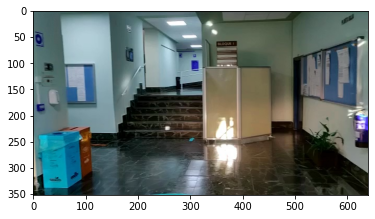

In [8]:
plt.imshow(nodo1)
plt.show()

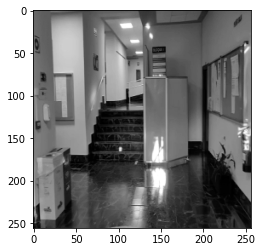

In [7]:
grayImage = cv2.cvtColor(nodo1, cv2.COLOR_BGR2GRAY)
img_pred = cv2.resize(grayImage, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(img_pred, cmap='gray')
plt.show()

In [6]:
hist = cv2.calcHist([img_pred], [0], None, [256], [0, 256])
hist /= hist.sum() # Normalize

(0.0, 256.0)

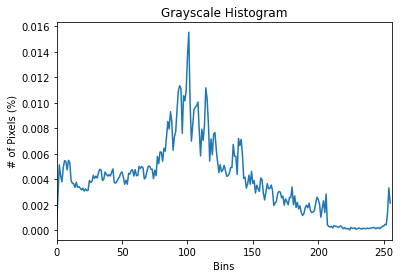

In [9]:
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels (%)")
plt.plot(hist)
plt.xlim([0, 256])

## Procesado de los fotogramas y volcado de los histogramas en CSVs

Nota: la primera fila de los csv de los histogramas de cada nodo individual son los índices de las columnas (del 0 al 255). Los datos empiezan en la segunda fila

In [129]:
i = 1
df = None
df_norm = None
first_all = True

for node in os.listdir("./fotogramas/Fotogramas"):
    first = True
    print(node)
    for image_file in os.listdir("./fotogramas/Fotogramas/{}".format(node)):
        image = cv2.imread("./fotogramas/Fotogramas/{}/{}".format(node,image_file))
        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_pred = cv2.resize(grayImage, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
        hist = cv2.calcHist([img_pred], [0], None, [256], [0, 256])
        hist_norm = hist / hist.sum() # Normalize

        if first:
            df = pd.DataFrame(hist.T, index=None)
            df_norm = pd.DataFrame(hist_norm.T, index=None)
            first = False
        else:
            df = df.append(pd.DataFrame(hist.T, index=None))
            df_norm = df_norm.append(pd.DataFrame(hist_norm.T, index=None))
        
        if first_all:

            labels = [int(node[-1])]
            res = pd.DataFrame()
            res = pd.DataFrame(hist.flatten(), index=None).transpose()

            res_norm = pd.DataFrame()
            res_norm = pd.DataFrame(hist_norm.flatten(), index=None).transpose()
            first_all = False

        else:
            labels.append(int(node[-1]))
            index = len(res)
            res.loc[index,:] = hist.flatten().reshape((1,256))
            
            res_norm.loc[index,:] = hist_norm.flatten().reshape((1,256))


    df.to_csv("./histogramas/{}.csv".format(node), index=None)
    df_norm.to_csv("./histogramas/{}_norm.csv".format(node), index=None)
    i += 1

res['nodo'] = labels
res_norm['nodo'] = labels

res.to_csv("./histogramas/ALL.csv", index=None)
res_norm.to_csv("./histogramas/ALL_norm.csv", index=None)


nodo4
nodo1
nodo6
nodo3
nodo2
nodo5


# Generación modelo

In [130]:
data = pd.read_csv("./histogramas/ALL_norm.csv")
print(data.shape)
data.head()

(2842, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,nodo
0,0.076187,0.050186,0.029785,0.023895,0.011703,0.016449,0.015701,0.011826,0.012344,0.012955,...,0.003052,0.003586,0.004272,0.004349,0.009140,0.023087,0.006638,0.001816,0.000763,4
1,0.000244,0.000137,0.000076,0.000092,0.000076,0.000107,0.000046,0.000214,0.000137,0.000366,...,0.000031,0.000015,0.000000,0.000000,0.000000,0.000015,0.000015,0.000031,0.000015,4
2,0.070389,0.040436,0.026474,0.022903,0.011871,0.015762,0.017578,0.011734,0.014084,0.011581,...,0.002686,0.003296,0.004196,0.004959,0.008865,0.026672,0.008743,0.002045,0.000336,4
3,0.011887,0.012070,0.009171,0.005859,0.003738,0.004791,0.005661,0.006760,0.006226,0.007401,...,0.000763,0.000565,0.000763,0.000992,0.000900,0.001434,0.003845,0.005646,0.030319,4
4,0.000717,0.001572,0.002060,0.001602,0.001648,0.002121,0.002197,0.001968,0.001923,0.003708,...,0.000244,0.000443,0.000519,0.000732,0.000504,0.000214,0.000046,0.000046,0.000000,4


In [131]:
train_data = pd.DataFrame()
for i in range(6):
    train_data = train_data.append(data[data.nodo == i+1][:10])
print(train_data.shape)
train_data.head()

(60, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,nodo
668,0.006531,0.006363,0.005447,0.005493,0.004715,0.005234,0.006485,0.004608,0.004166,0.004028,...,0.000763,0.000687,0.001343,0.001572,0.001541,0.001968,0.003098,0.003967,0.000671,1
669,0.000046,0.004135,0.007690,0.008240,0.005630,0.007690,0.008499,0.008133,0.008118,0.005569,...,0.000183,0.000214,0.000244,0.000412,0.000839,0.000748,0.001587,0.003860,0.003601,1
670,0.000214,0.001938,0.004440,0.003403,0.002930,0.003372,0.003433,0.004211,0.004623,0.003693,...,0.000961,0.000992,0.000931,0.001251,0.001419,0.002487,0.004318,0.012436,0.009125,1
671,0.000000,0.003525,0.005798,0.005676,0.003494,0.006821,0.008652,0.009079,0.008408,0.010803,...,0.000320,0.000214,0.000168,0.000305,0.000443,0.001129,0.001678,0.004684,0.006256,1
672,0.004196,0.008148,0.005478,0.006165,0.005112,0.005524,0.005783,0.005432,0.005203,0.003937,...,0.000824,0.001099,0.000916,0.001190,0.001724,0.002335,0.003250,0.007523,0.003540,1


In [132]:
x = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

x_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]

In [168]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x, y)

predictions = model.predict(x_test)
precision = accuracy_score(y_test, predictions)
print(f'La precisión del modelo es de {round(precision*100, 2)}%')

La precisión del modelo es de 74.49%


In [158]:
def model_predict_hist(model, data, index):
    return model.predict(data.iloc[index, :-1].values.reshape(1,256))[0]
    

In [169]:
model_predict_hist(model, data, 600)

4